<a href="https://colab.research.google.com/github/Harshit-tech9/Linear-Regression-Bike-Sharing/blob/main/Bike_Rental_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set_style('whitegrid')
sns.set_palette("bright")

In [2]:
df = pd.read_csv('/content/day.csv') #importing the CSV file
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
df.info() #Understanding the Dtype of column and number of Null values present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Columns Dtype needs to change are as follow dteday, season, yr and Holiday.

Here **dteday** column is in the object data type which we need to change to date time format.

**Season, yr and holiday** columns are categorical in nature which we need to change to object or category type.

In [4]:
# Changing the data type of columns
df['dteday'] = df['dteday'].apply(pd.to_datetime)
df.head()

<ipython-input-4-a998445600ba>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dteday'] = df['dteday'].apply(pd.to_datetime)


instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        6           0   
1        2 2018-02-01       1   0     1        0        0           0   
2        3 2018-03-01       1   0     1        0        1           1   
3        4 2018-04-01       1   0     1        0        2           1   
4        5 2018-05-01       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']] = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']].astype('category') # To category because it consumes less memory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    category      
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    category      
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    category      
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(7), datetime64

In [6]:
# Writing a function for plotting a line plot
def line_plot(df, xlabel = 'Date', ylabel = 'Count of Bike Rentals'):
  plt.figure(figsize=(15,6))
  sns.lineplot(x="dteday", y="cnt", data=df)
  plt.xlabel(xlabel,  size = 12)
  plt.ylabel(ylabel, size = 12)
  plt.title('Line Plot of Count over Time', size = 15)
  plt.show()

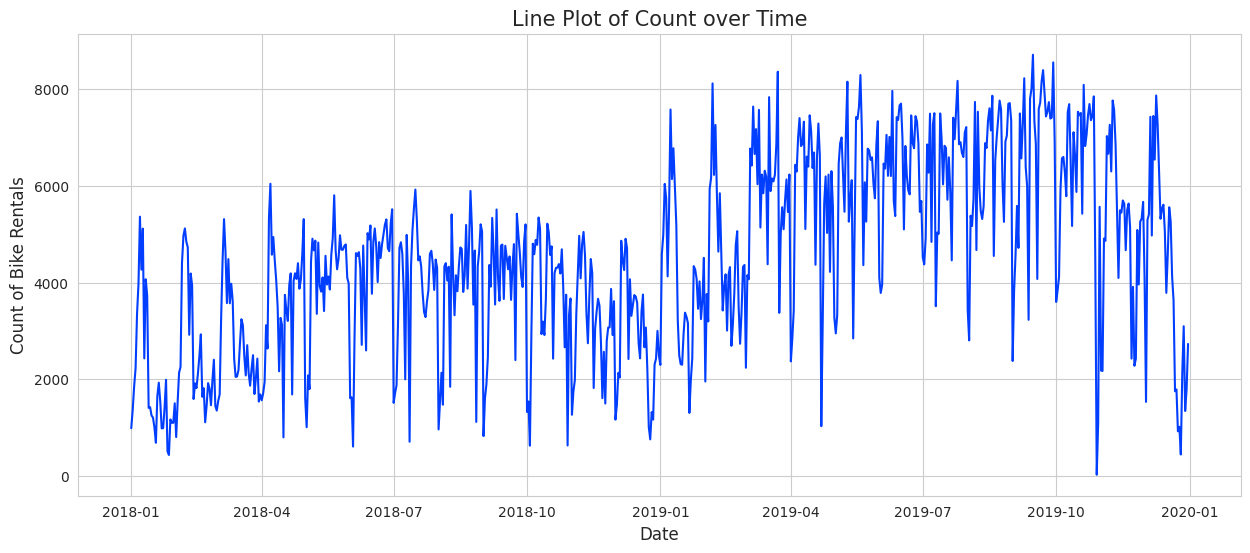

In [7]:
line_plot(df)

Here we can observe that bikesharing count were higher in the 2019 compared to 2018 but due to there is also a sharp decline points in the year 2019 compared to 2018 at few weeks/day. here we need to analyse here.

Now we will seperate dataframe on the basis of year 2018 and 2019.

In [8]:
df_copy = df.copy()
df_18 = df_copy[df_copy['yr'] == 0] # Here 0 represent a year 2018
df_19 = df_copy[df_copy['yr'] == 1] # Here 1 represents a year 2019

display(df_18.head())
display(df_19.head())


instant     dteday season yr mnth holiday weekday workingday weathersit  \
0        1 2018-01-01      1  0    1       0       6          0          2   
1        2 2018-02-01      1  0    1       0       0          0          2   
2        3 2018-03-01      1  0    1       0       1          1          1   
3        4 2018-04-01      1  0    1       0       2          1          1   
4        5 2018-05-01      1  0    1       0       3          1          1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

instant     dteday season yr mnth holiday weekday workingday weathersit  \
365      366 2019-01-01      1  1    1       0       0          0          1   
366      367 2019-02-01      1  1    1       1       1          0          1   
367      368 2019-03-01      1  1    1       0       2          1          1   
368      369 2019-04-01      1  1    1       0       3          1          2   
369      370 2019-05-01      1  1    1       0       4          1          1   

          temp     atemp      hum  windspeed  casual  registered   cnt  
365  15.170000  18.78105  69.2500  12.875189     686        1608  2294  
366  11.194763  12.61520  38.1304  22.087555     244        1707  1951  
367   6.150000   6.31375  44.1250  24.499957      89        2147  2236  
368   4.407500   5.96685  41.4583  12.374900      95        2273  2368  
369  10.899153  13.92060  52.4167   8.709129     140        3132  3272

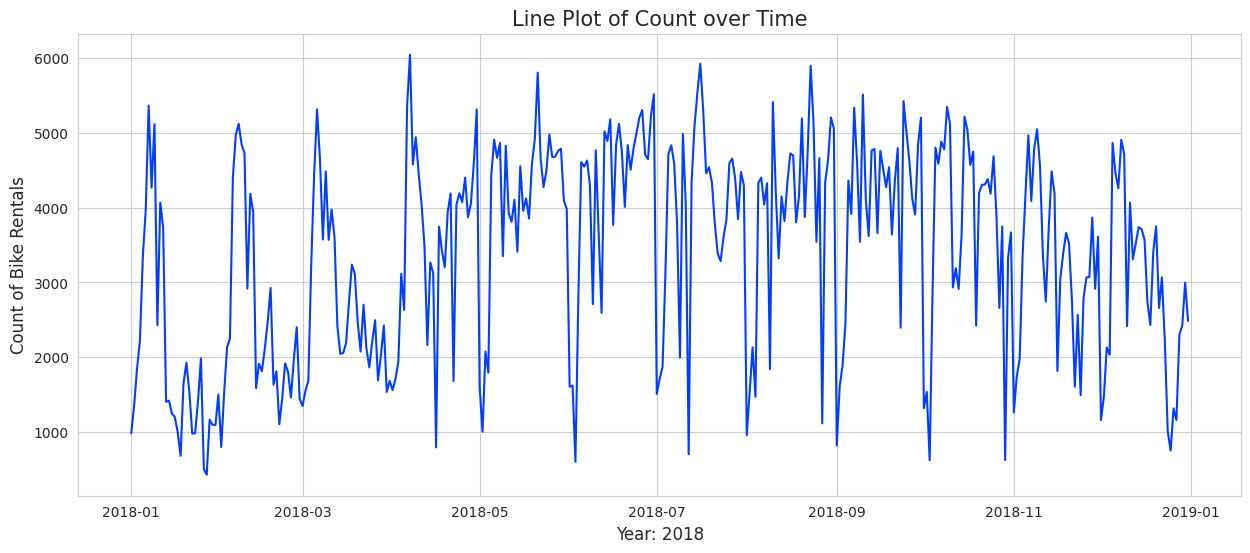

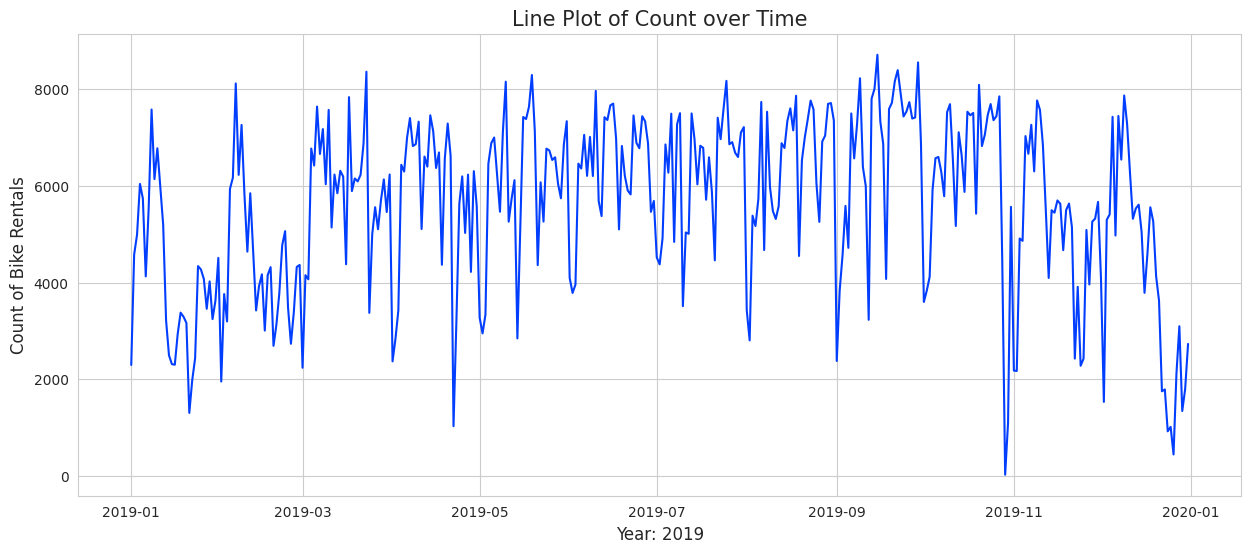

In [9]:
line_plot(df_18, 'Year: 2018', 'Count of Bike Rentals')
line_plot(df_19, 'Year: 2019', 'Count of Bike Rentals')

In [10]:
# Writing a function for plotting a line plot
def line_plot_temp(df, xlabel = 'Temp', ylabel = 'Count of Bike Sharing'):
  plt.figure(figsize=(15,6))
  sns.regplot(x="temp", y="cnt", data=df, line_kws={'color': 'g'})
  plt.xlabel(xlabel,  size = 12)
  plt.ylabel(ylabel, size = 12)
  plt.title('Line Plot of Count over Temperature', size = 15)
  plt.show()

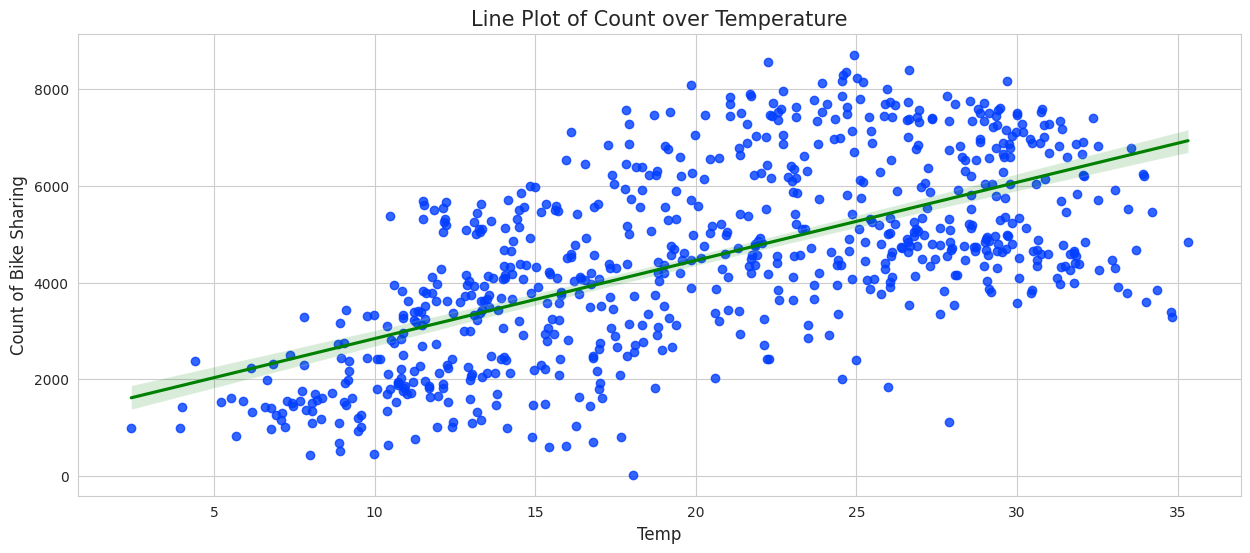

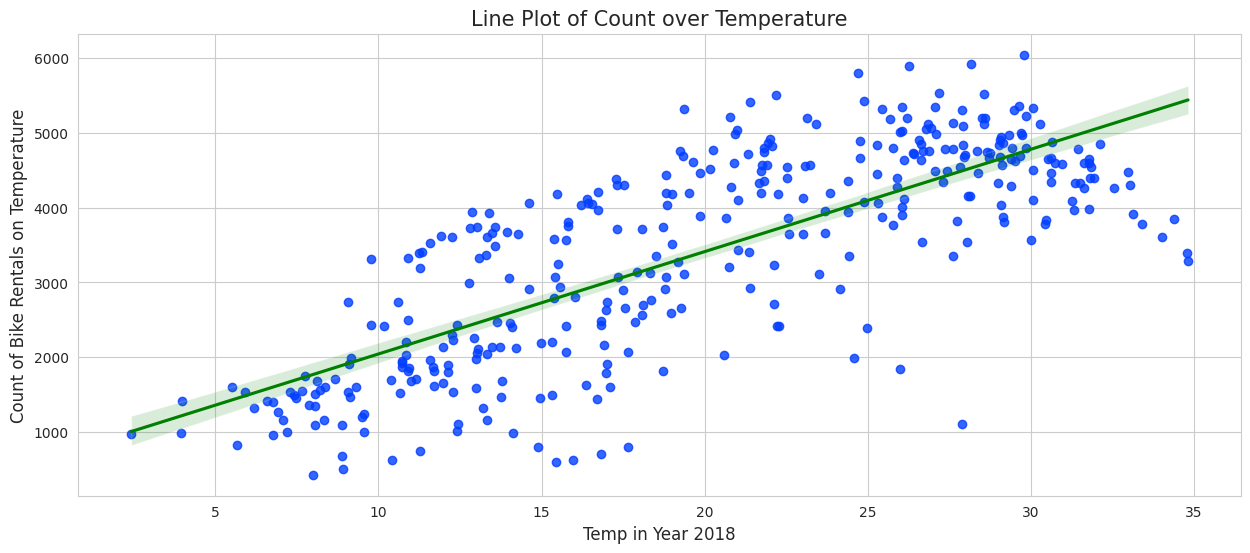

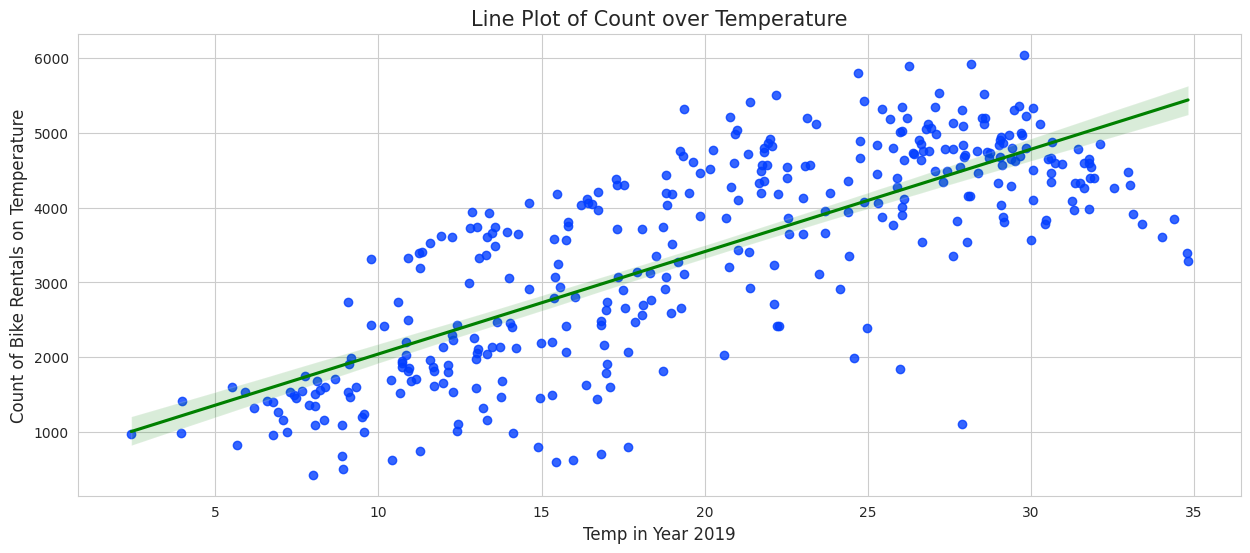

In [11]:
line_plot_temp(df)
line_plot_temp(df_18,'Temp in Year 2018','Count of Bike Rentals on Temperature')
line_plot_temp(df_18,'Temp in Year 2019', 'Count of Bike Rentals on Temperature')

**General** **Observation**
> Here We can observe as temperature increases our rental counts also increases.




In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    category      
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    category      
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    category      
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(7), datetime64

In [13]:
display(df.holiday.value_counts())
display(df.weekday.value_counts())
display(df.workingday.value_counts())
display(df.season.value_counts() )

0    709
1     21
Name: holiday, dtype: int64

0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

1    499
0    231
Name: workingday, dtype: int64

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
def line_plot_with_hue(df, hue, xlabel = 'Date', ylabel = 'Count of Bike Sharing'):
  plt.figure(figsize=(15,6))
  sns.scatterplot(x="dteday", y="cnt", data=df, hue = hue)
  plt.xlabel(xlabel,  size = 12)
  plt.ylabel(ylabel, size = 12)
  plt.title('Scatter Plot of Count over Time', size = 15)
  plt.show()

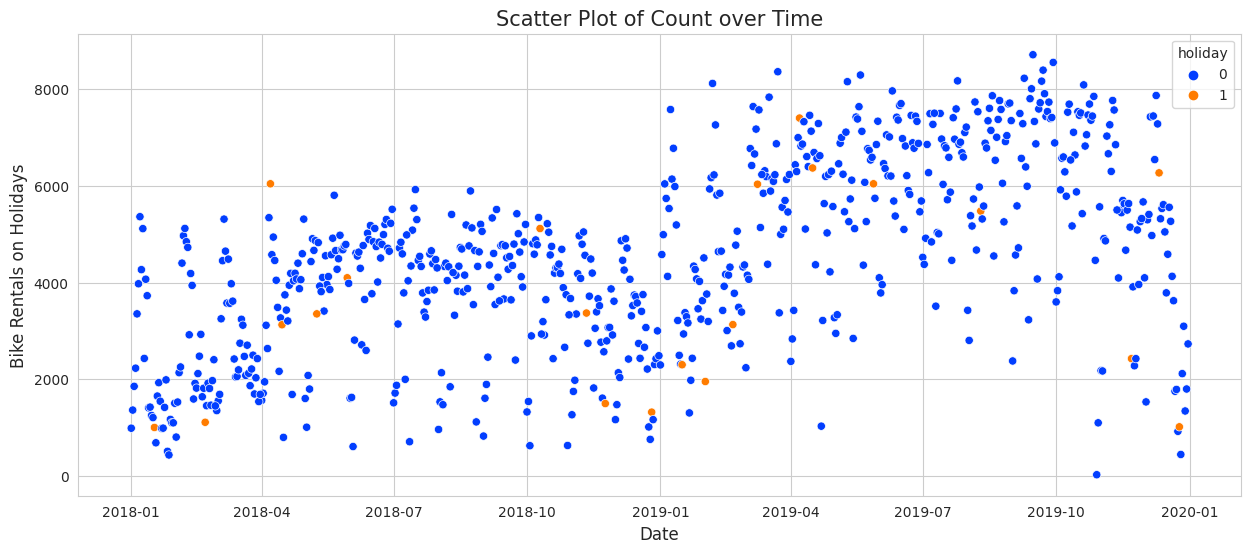

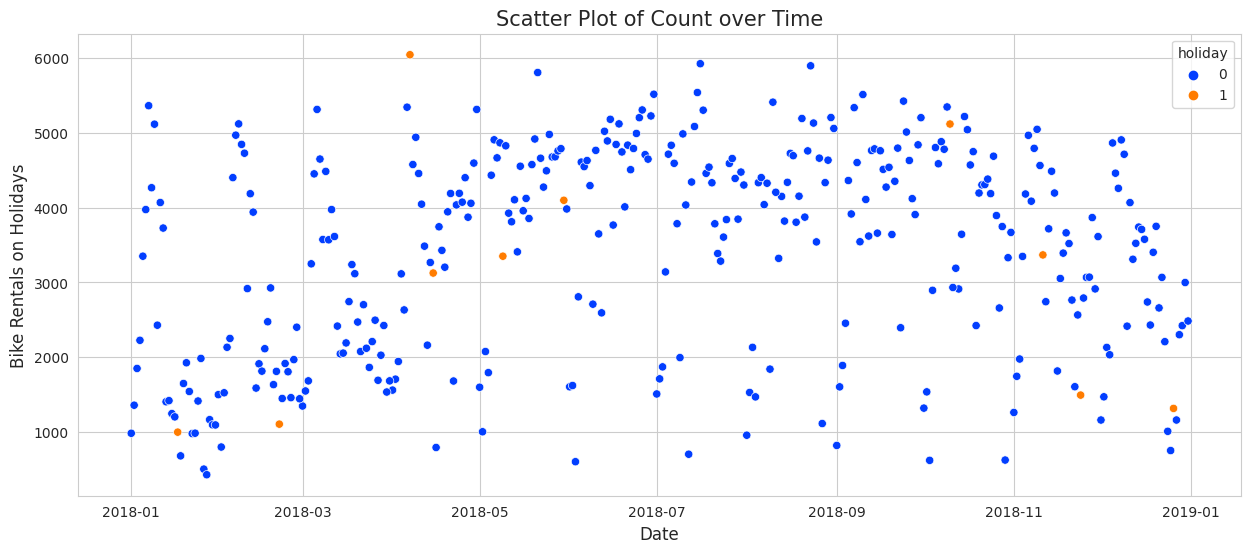

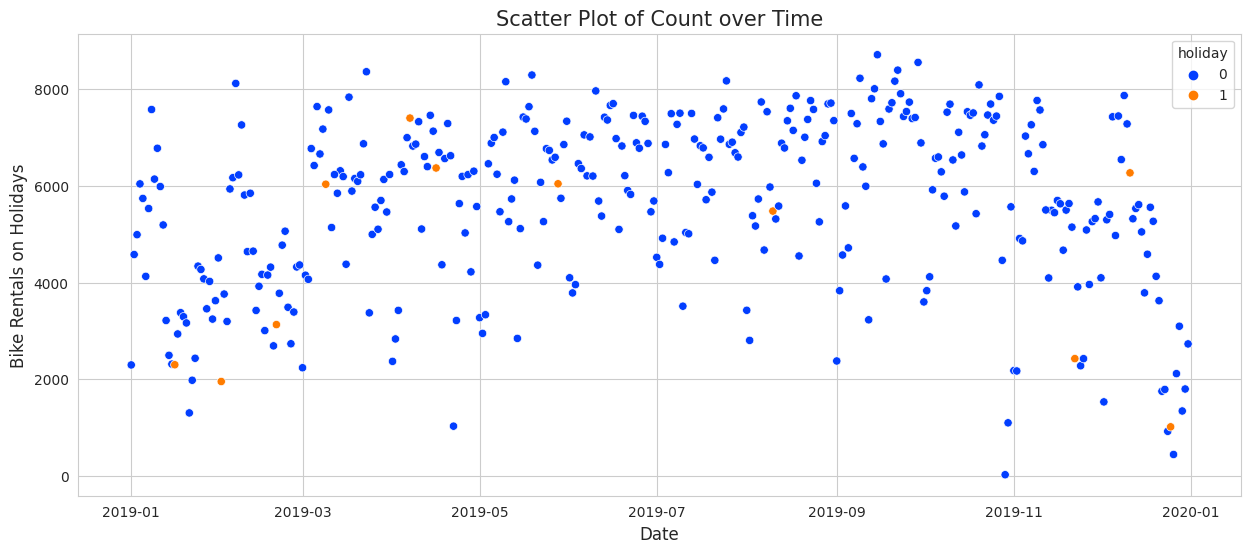

In [15]:
line_plot_with_hue(df, 'holiday', "Date", "Bike Rentals on Holidays")
line_plot_with_hue(df_18, 'holiday', "Date", "Bike Rentals on Holidays")
line_plot_with_hue(df_19, 'holiday', "Date", "Bike Rentals on Holidays")

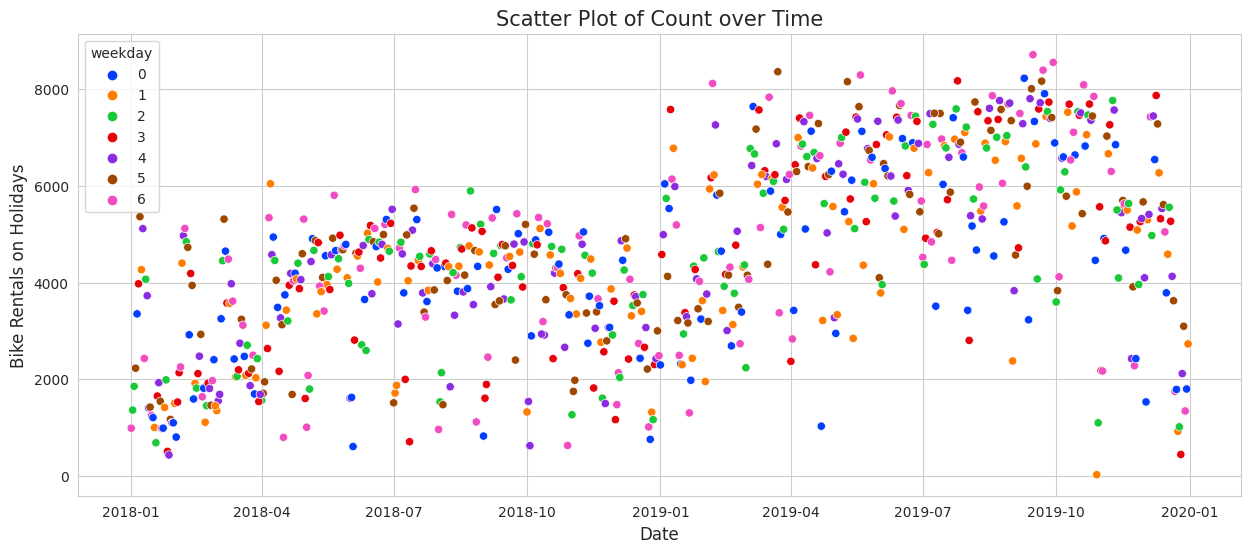

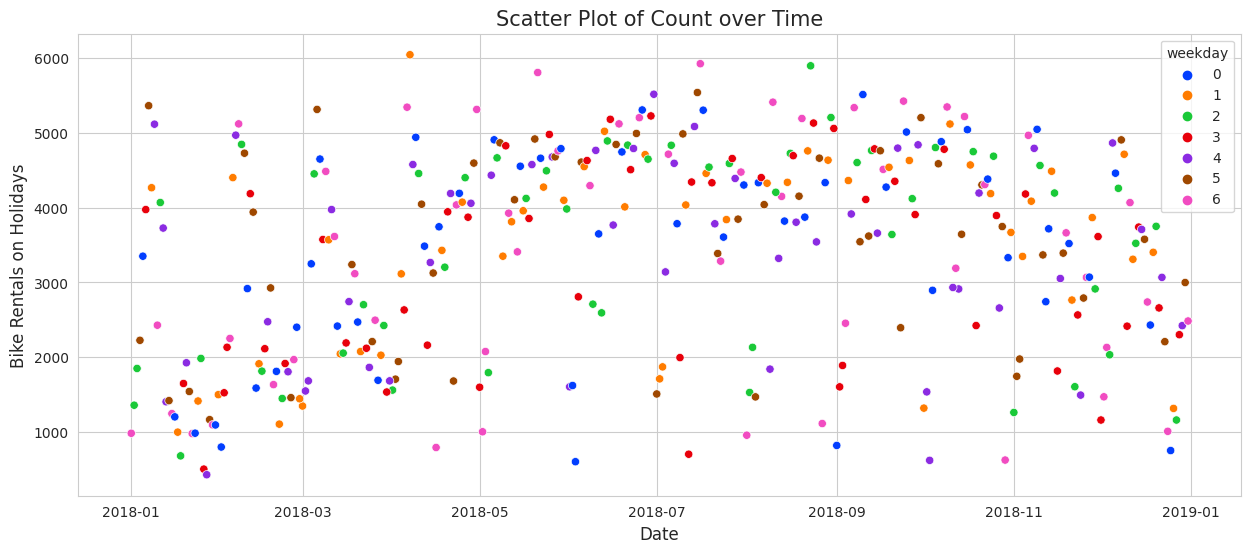

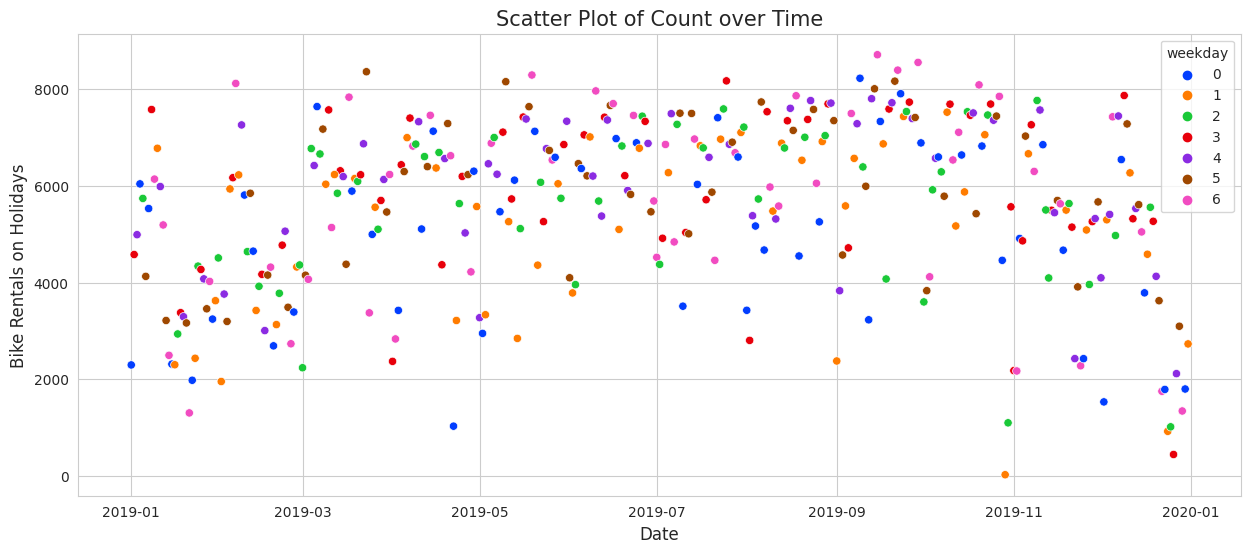

In [16]:
line_plot_with_hue(df, 'weekday',"Date", "Bike Rentals on Holidays")
line_plot_with_hue(df_18, 'weekday',"Date", "Bike Rentals on Holidays")
line_plot_with_hue(df_19, 'weekday',"Date", "Bike Rentals on Holidays")

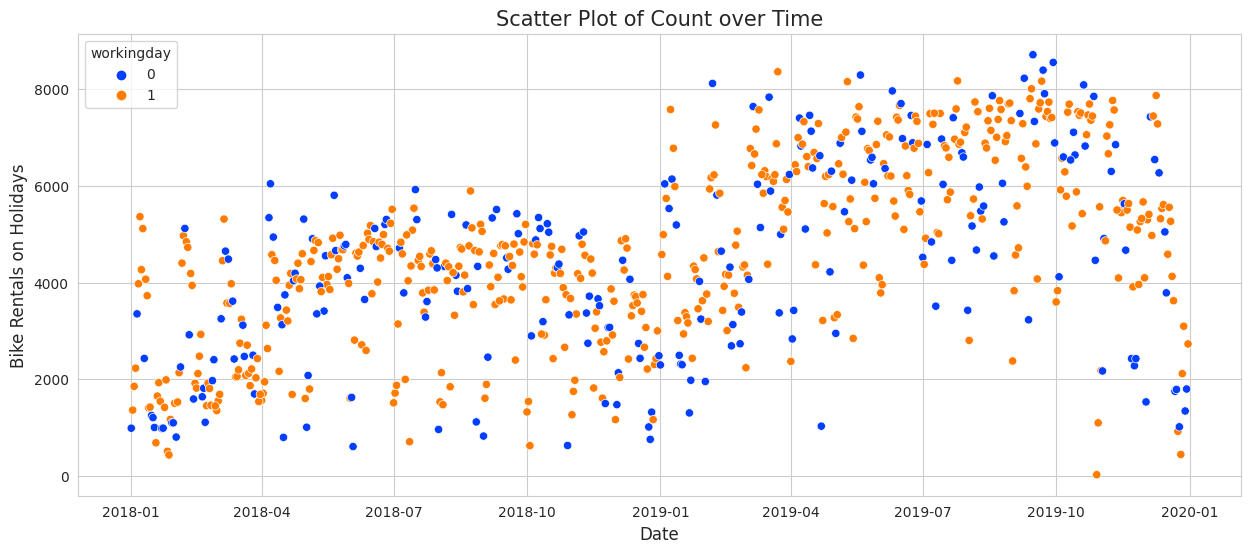

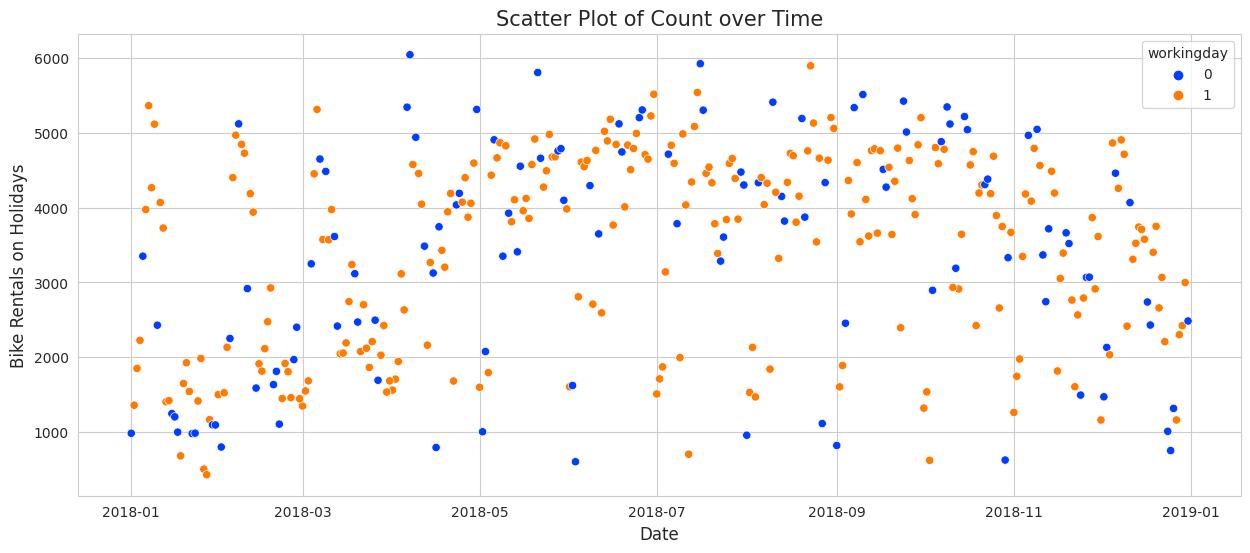

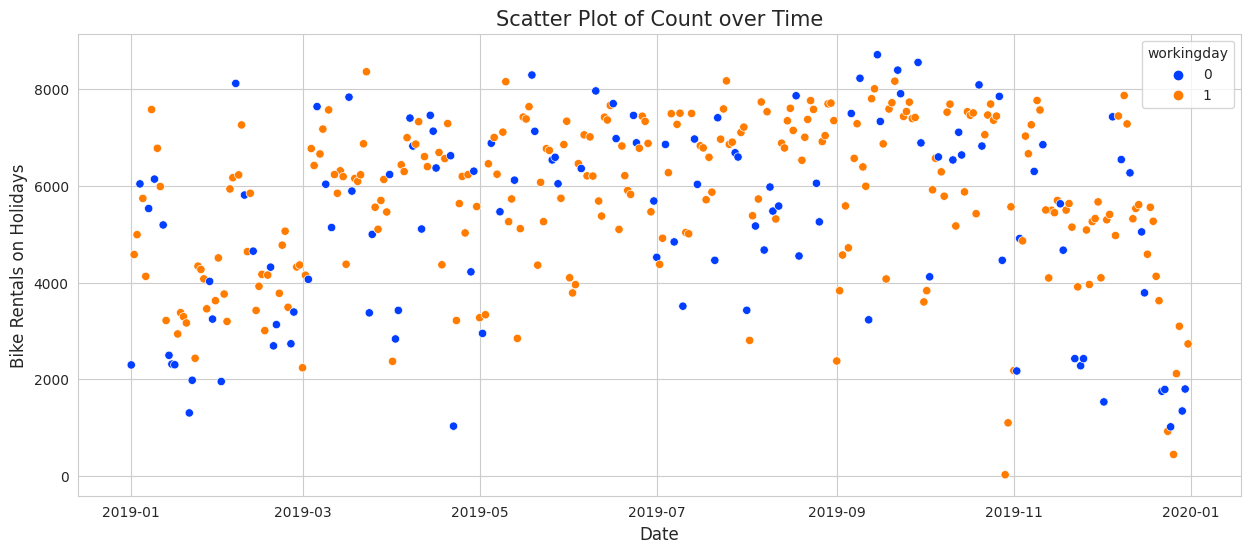

In [17]:
line_plot_with_hue(df, 'workingday',"Date", "Bike Rentals on Holidays")
line_plot_with_hue(df_18, 'workingday',"Date", "Bike Rentals on Holidays")
line_plot_with_hue(df_19, 'workingday',"Date", "Bike Rentals on Holidays")

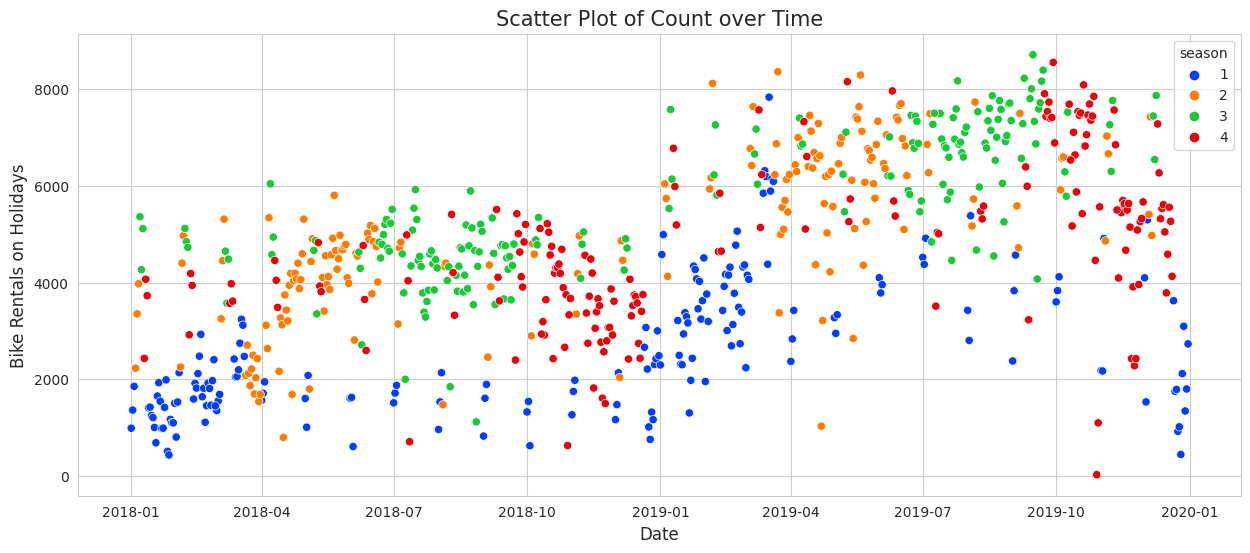

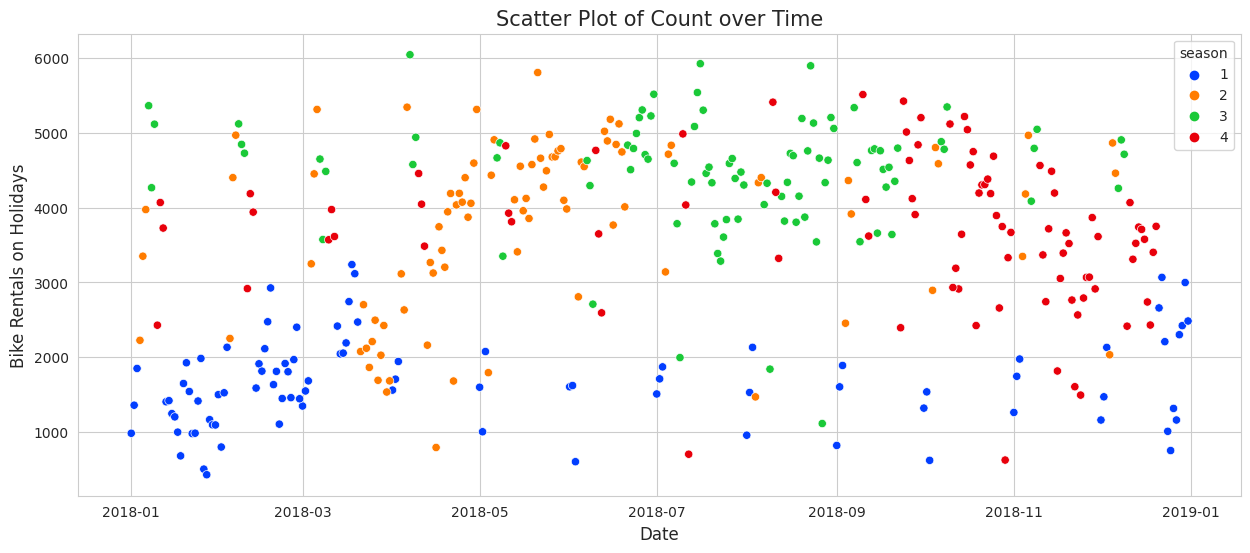

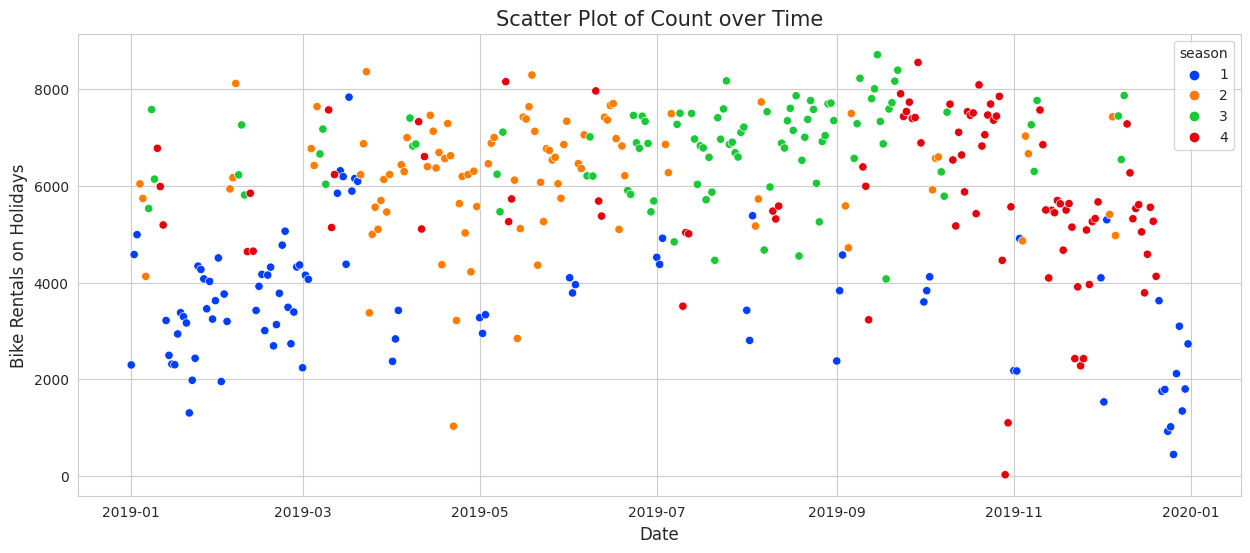

In [18]:
line_plot_with_hue(df, 'season',"Date", "Bike Rentals on Holidays")
line_plot_with_hue(df_18, 'season',"Date", "Bike Rentals on Holidays")
line_plot_with_hue(df_19, 'season',"Date", "Bike Rentals on Holidays")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    category      
 3   yr          730 non-null    category      
 4   mnth        730 non-null    category      
 5   holiday     730 non-null    category      
 6   weekday     730 non-null    category      
 7   workingday  730 non-null    category      
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(7), datetime64

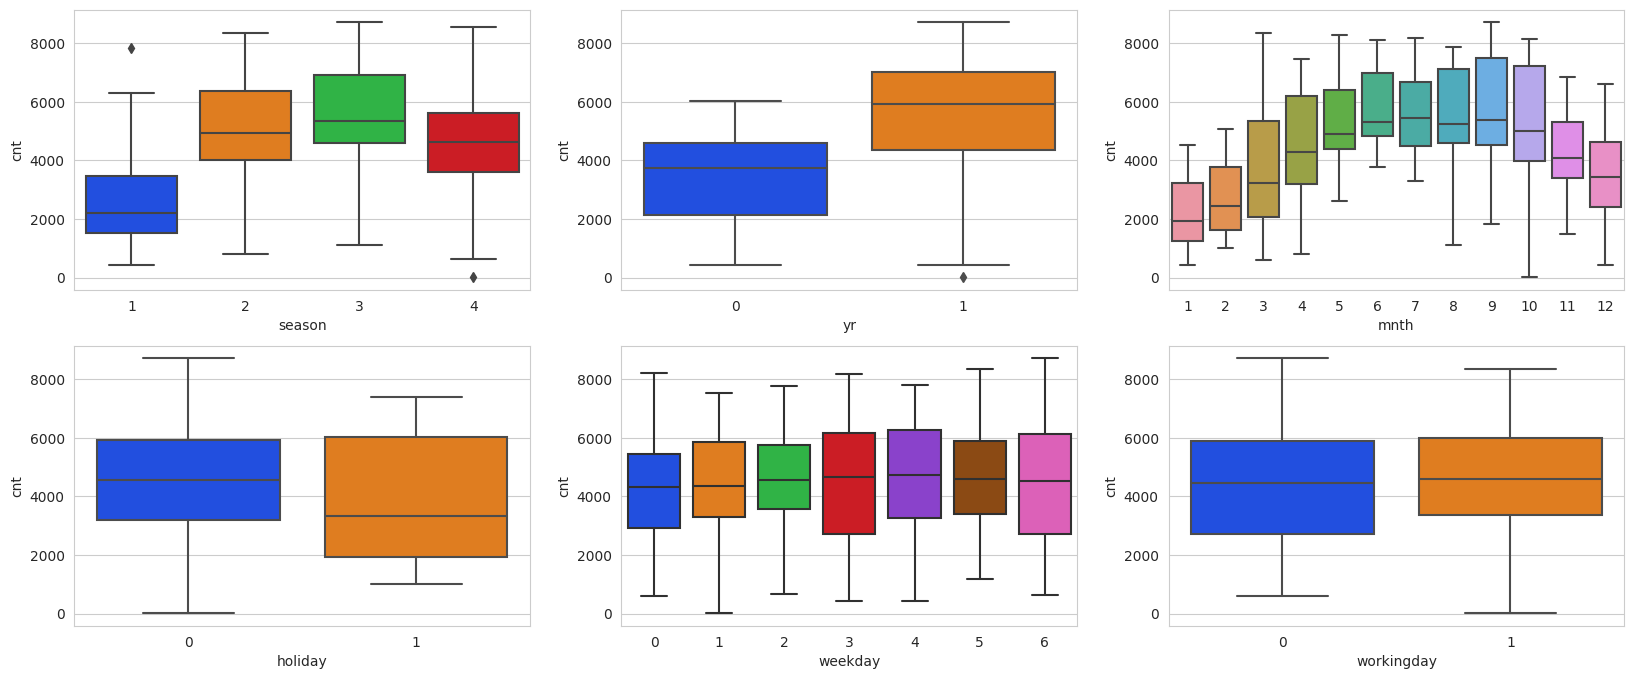

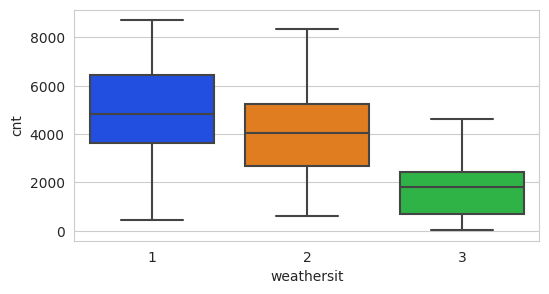

In [20]:
fig, ax = plt.subplots(2,3, figsize=(20,8))
sns.boxplot(x = 'season', y = 'cnt', data=df, ax=ax[0][0])
sns.boxplot(x = 'yr', y = 'cnt', data=df, ax=ax[0][1])
sns.boxplot(x = 'mnth', y = 'cnt', data=df, ax=ax[0][2])
sns.boxplot(x = 'holiday', y = 'cnt', data=df, ax=ax[1][0])
sns.boxplot(x = 'weekday', y = 'cnt', data=df, ax=ax[1][1])
sns.boxplot(x = 'workingday', y = 'cnt', data=df, ax=ax[1][2])
plt.show()

plt.figure(figsize=(6,3))
sns.boxplot(x = 'weathersit', y = 'cnt', data=df)
plt.show()

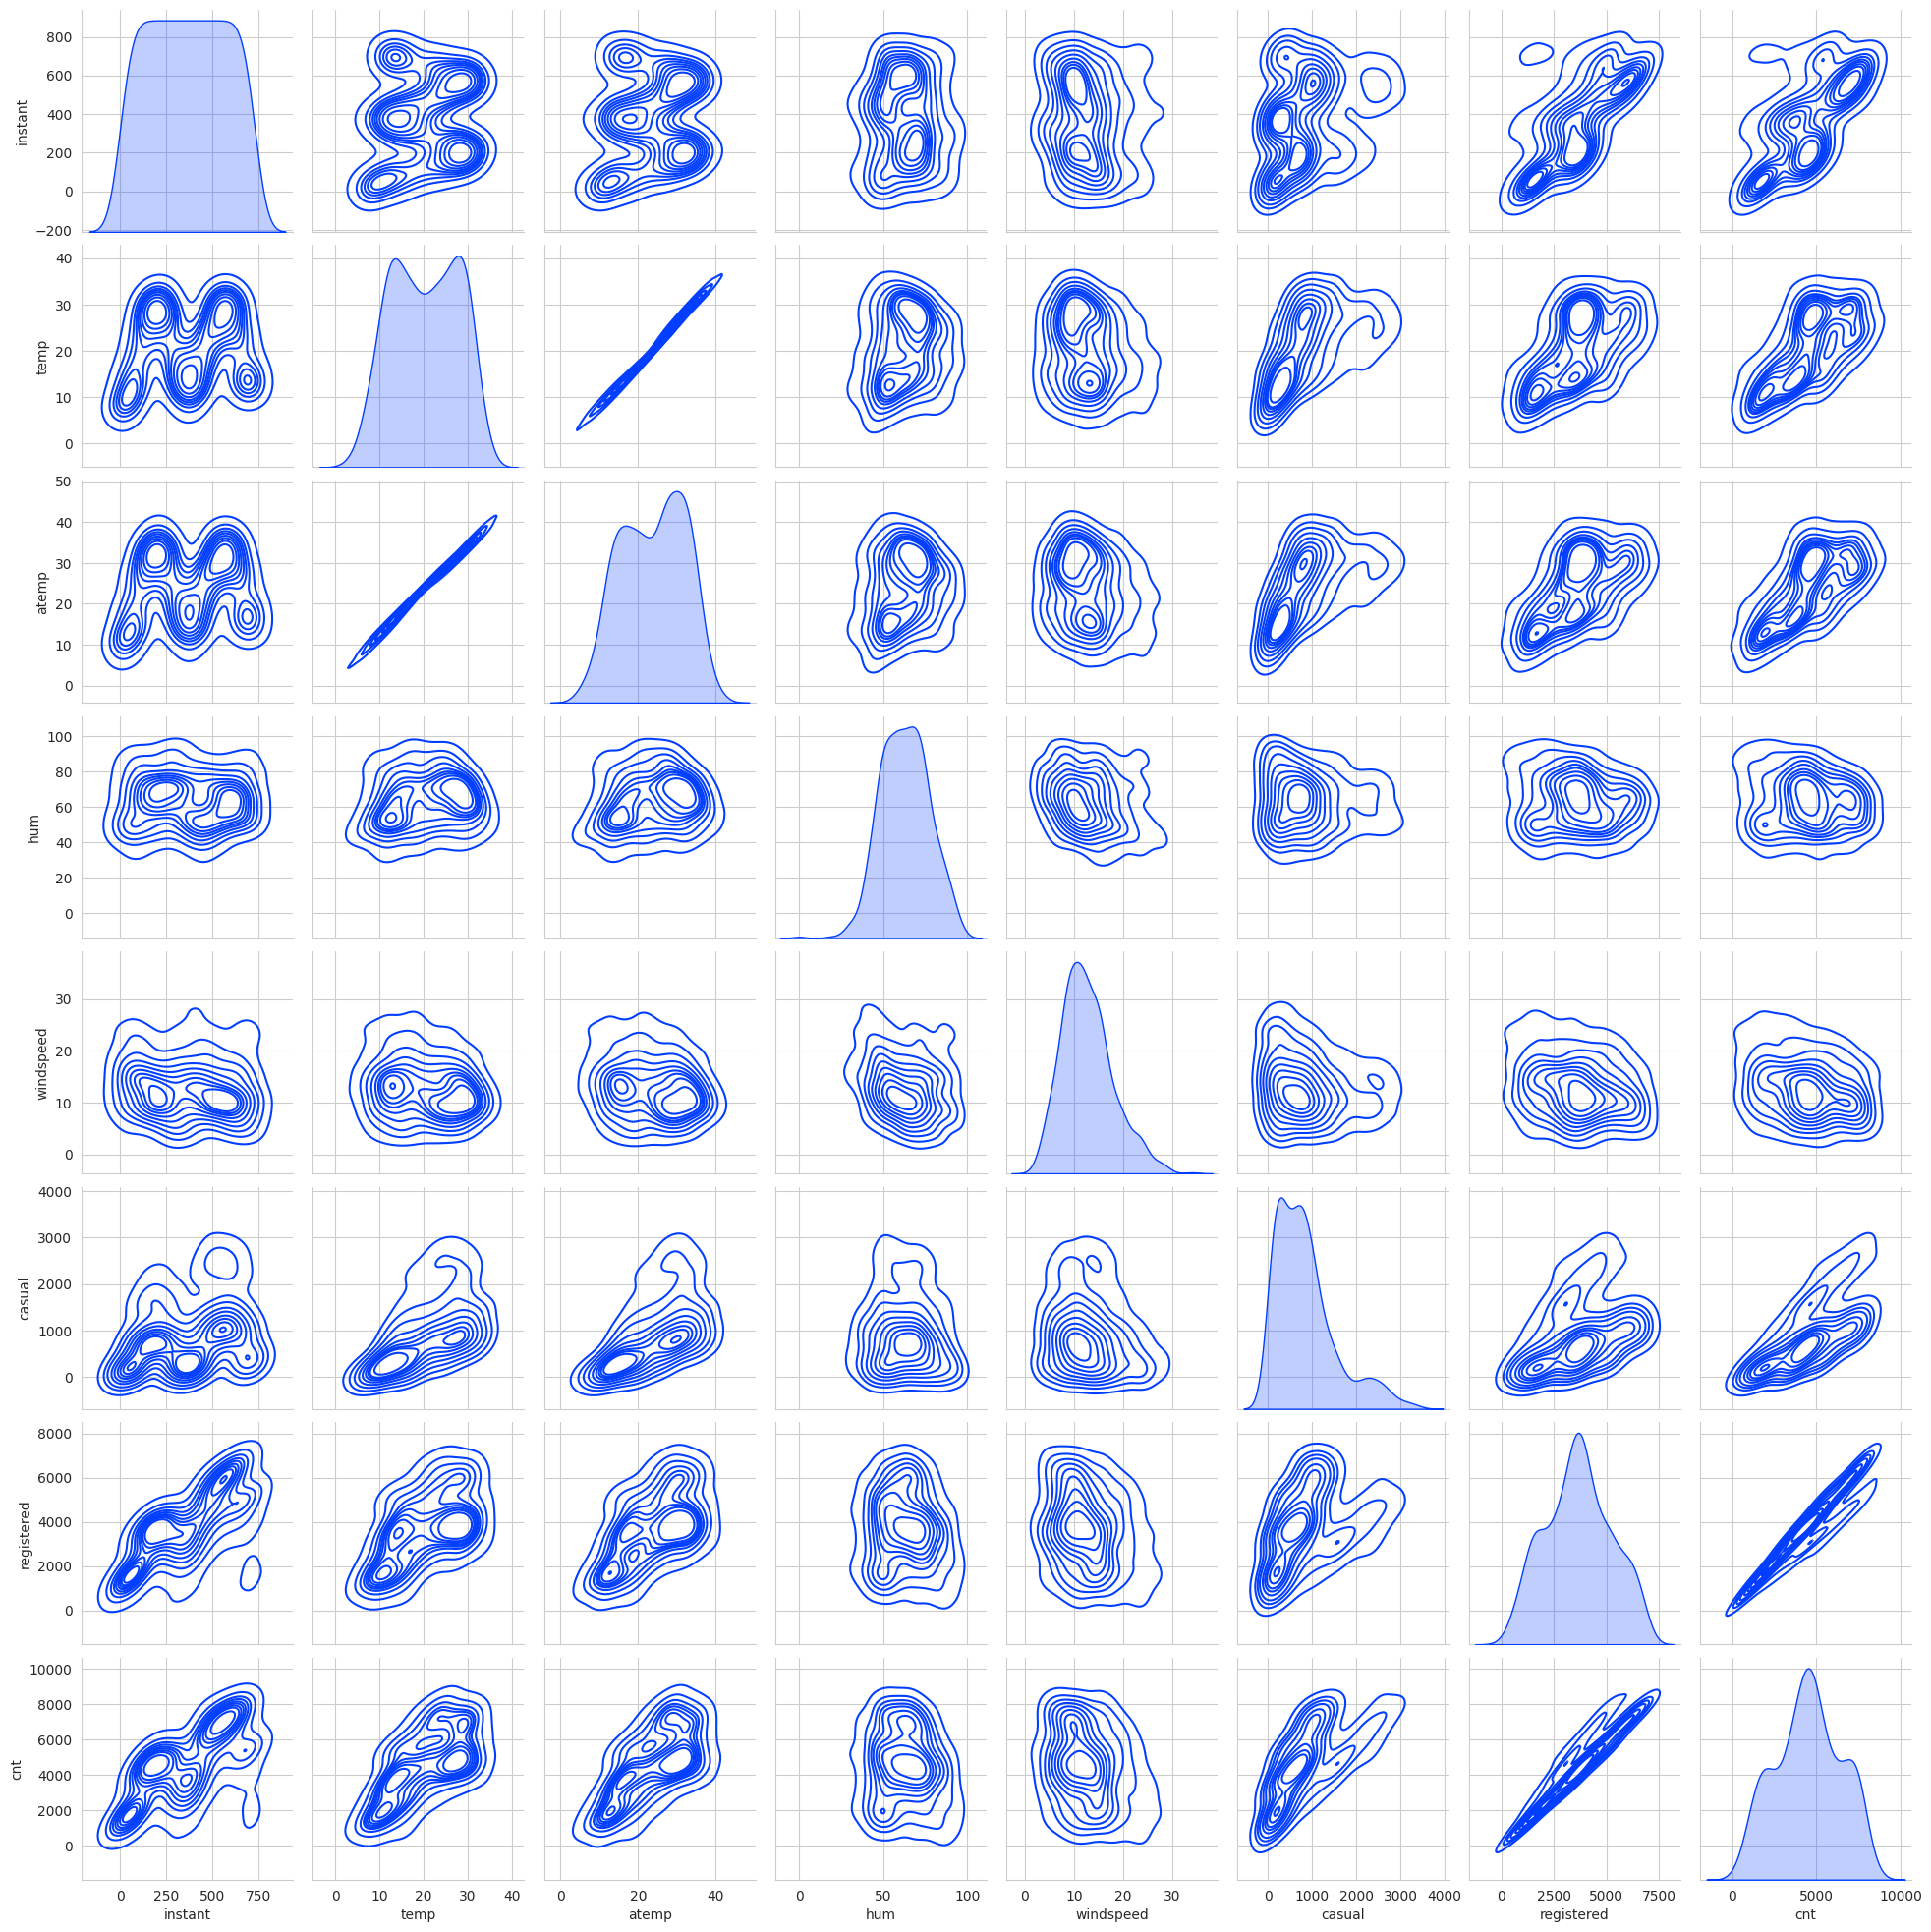

In [21]:
sns.pairplot(df,kind='kde')

<ipython-input-22-4fcfdcd0c1e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


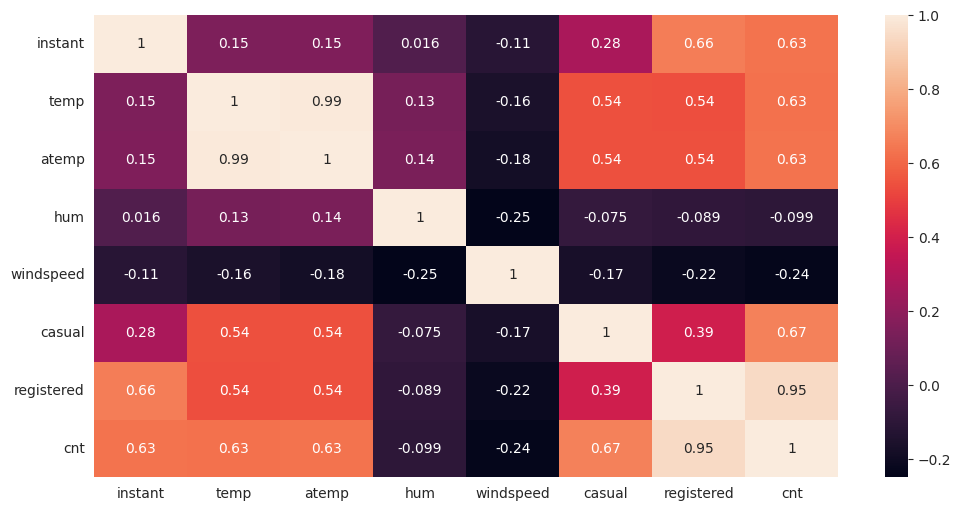

In [22]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(data=corr, annot = True)
plt.show()

# Feature Scaling

In [23]:
X = df.drop(columns=['cnt','instant', 'dteday'])
y = df[['cnt']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [26]:
X_train_sm = sm.add_constant(X_train)

In [27]:
# creating a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

In [28]:
#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.282e+29
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:35:48   Log-Likelihood:                 11601.
No. Observations:                 511   AIC:                        -2.317e+04
Df Residuals:                     497   BIC:                        -2.311e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        425.0000    1.1e-11   3.85e+13      0.0

In [29]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features          VIF
8        atemp  1205.698007
7         temp  1125.319436
12  registered    32.222082
0       season    26.396604
9          hum    26.120431
2         mnth    16.094186
6   weathersit    13.965176
5   workingday     8.883517
11      casual     8.356457
1           yr     5.484905
10   windspeed     4.961268
4      weekday     3.152973
3      holiday     1.097943

High p-value, high VIF
- High - low :
  - High p, low VIF : remove this first
  - Low p , high VIF : remove these ones after above

- Low p, low VIF

In [30]:

# High p-value, low VIF
X = X_train.drop('holiday', axis = 1)

X_train_sm = sm.add_constant(X)

# creating a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.810e+29
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:35:48   Log-Likelihood:                 12042.
No. Observations:                 511   AIC:                        -2.406e+04
Df Residuals:                     498   BIC:                        -2.400e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        425.0000   4.58e-12   9.27e+13      0.0

In [31]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features          VIF
7        atemp  1204.856396
6         temp  1124.220578
11  registered    32.204695
0       season    26.382937
8          hum    25.714752
2         mnth    16.048323
5   weathersit    13.915202
4   workingday     8.718462
10      casual     8.338031
1           yr     5.463369
9    windspeed     4.954641
3      weekday     3.141579

In [32]:
# High p-value, low VIF
X = X.drop('workingday', axis = 1)

X_train_sm = sm.add_constant(X)

# creating a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.533e+30
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:35:48   Log-Likelihood:                 12191.
No. Observations:                 511   AIC:                        -2.436e+04
Df Residuals:                     499   BIC:                        -2.431e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        425.0000   3.33e-12   1.28e+14      0.0

In [33]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features          VIF
6        atemp  1191.332139
5         temp  1115.495876
0       season    25.917334
7          hum    25.416433
10  registered    20.174193
2         mnth    16.037593
4   weathersit    13.734325
1           yr     4.885252
8    windspeed     4.825881
9       casual     4.262154
3      weekday     3.099621

In [34]:
# High p-value, low VIF
X = X.drop('windspeed', axis = 1)

X_train_sm = sm.add_constant(X)

# creating a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.174e+29
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:35:48   Log-Likelihood:                 11889.
No. Observations:                 511   AIC:                        -2.376e+04
Df Residuals:                     500   BIC:                        -2.371e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        425.0000   4.73e-12   8.98e+13      0.0

In [35]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features          VIF
6       atemp  1145.824410
5        temp  1066.842377
0      season    25.797505
7         hum    24.758500
9  registered    20.142970
2        mnth    15.969079
4  weathersit    13.309466
1          yr     4.831040
8      casual     4.261657
3     weekday     3.025662

In [36]:
# High p-value, low VIF
X = X.drop('weekday', axis = 1)

X_train_sm = sm.add_constant(X)

# creating a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.816e+31
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:35:48   Log-Likelihood:                 12770.
No. Observations:                 511   AIC:                        -2.552e+04
Df Residuals:                     501   BIC:                        -2.548e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        425.0000   8.15e-13   5.22e+14      0.0

In [37]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features          VIF
5       atemp  1145.396204
4        temp  1066.730270
0      season    25.796592
6         hum    24.377456
8  registered    19.639776
2        mnth    15.969005
3  weathersit    13.123372
1          yr     4.788268
7      casual     4.189425

## Now We will have high VIF and low P

In [38]:
# High p-value, low VIF
X = X.drop('season', axis = 1)

X_train_sm = sm.add_constant(X)

# creating a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.828e+30
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:35:48   Log-Likelihood:                 12401.
No. Observations:                 511   AIC:                        -2.478e+04
Df Residuals:                     502   BIC:                        -2.475e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        425.0000   1.67e-12   2.54e+14      0.0

In [39]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features          VIF
4       atemp  1145.370829
3        temp  1066.553984
5         hum    24.202560
7  registered    16.796927
2  weathersit    12.994388
1        mnth     5.794315
0          yr     4.412245
6      casual     4.101006

In [40]:
# High p-value, low VIF
X = X.drop('registered', axis = 1)

X_train_sm = sm.add_constant(X)

# creating a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     283.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          4.41e-170
Time:                        06:35:48   Log-Likelihood:                -4184.2
No. Observations:                 511   AIC:                             8384.
Df Residuals:                     503   BIC:                             8418.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1317.2608    204.553      6.440      0.0

In [41]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features          VIF
4       atemp  1115.765212
3        temp  1059.201844
5         hum    24.134900
2  weathersit    12.397790
1        mnth     5.167869
6      casual     4.035880
0          yr     2.152194

In [42]:
# High p-value, low VIF
X = X.drop('atemp', axis = 1)

X_train_sm = sm.add_constant(X)

# creating a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     320.7
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.69e-168
Time:                        06:35:48   Log-Likelihood:                -4190.9
No. Observations:                 511   AIC:                             8396.
Df Residuals:                     504   BIC:                             8426.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1328.7003    207.021      6.418      0.0

In [43]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features        VIF
4         hum  22.561670
2  weathersit  12.060217
3        temp   9.777540
1        mnth   5.120801
5      casual   4.005038
0          yr   2.152189

In [44]:
X = X.drop('hum', axis = 1)

X_train_sm = sm.add_constant(X)

# creating a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     384.8
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.24e-169
Time:                        06:35:48   Log-Likelihood:                -4191.4
No. Observations:                 511   AIC:                             8395.
Df Residuals:                     505   BIC:                             8420.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1213.5100    164.053      7.397      0.0

In [45]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features       VIF
3        temp  7.924135
1        mnth  4.587294
2  weathersit  4.556448
4      casual  4.004970
0          yr  2.149050

In [46]:
X = X.drop('temp', axis = 1)

X_train_sm = sm.add_constant(X)

# creating a model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     257.3
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.90e-120
Time:                        06:35:48   Log-Likelihood:                -4309.1
No. Observations:                 511   AIC:                             8628.
Df Residuals:                     506   BIC:                             8649.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2477.7578    184.457     13.433      0.0

In [47]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features       VIF
1        mnth  4.030326
2  weathersit  3.636497
3      casual  2.554644
0          yr  2.148412

**Now all the given four features has low-p and low-VIF, Therefore, we can use mnt, weathersit, casual and yr column for building a predictive model.**

# Residual Analysis

In [48]:
y_train_pred = lr_model.predict(X_train_sm)

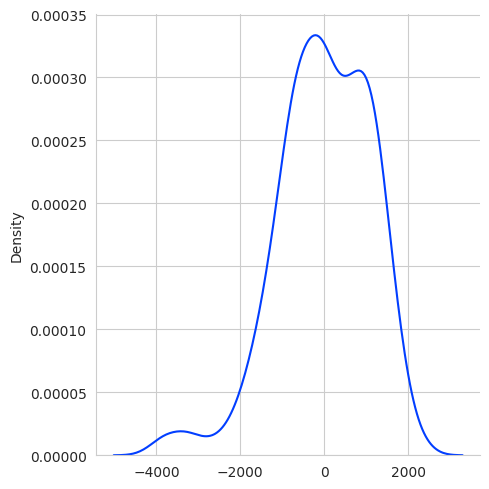

In [49]:
res = y_train['cnt'] - y_train_pred
sns.displot(res, kind='kde')

In [50]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
# scaler = MinMaxScaler()
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [51]:
X_test

season yr mnth holiday weekday workingday weathersit      temp     atemp  \
468      2  1    4       0       6          0          1  0.543115  0.536771   
148      2  0    5       0       0          0          1  0.758058  0.704203   
302      4  0   10       0       0          0          1  0.324018  0.317998   
355      1  0   12       0       4          1          2  0.453814  0.455552   
515      2  1    5       0       4          1          1  0.773634  0.724915   
..     ... ..  ...     ...     ...        ...        ...       ...       ...   
332      4  0   11       0       2          1          2  0.497426  0.488701   
532      2  1    6       0       0          0          1  0.664605  0.647005   
558      3  1    7       0       5          1          2  0.838014  0.772963   
137      2  0    5       0       3          1          2  0.611648  0.588177   
314      4  0   11       1       5          0          1  0.330249  0.298949   

          hum  windspeed    casual  registered  
468  0.518248   0.422104  0.859081    0.650689  
148  0.843709   0.479765  0.723404    0.308882  
302  0.642765   0.386287  0.270120    0.310873  
355  0.780592   0.062325  0.067222    0.371363  
515  0.507943   0.433030  0.336417    0.891577  
..        ...        ...       ...         ...  
332  0.856161   0.590357  0.026827    0.367841  
532  0.617003   0.306856  0.809436    0.601531  
558  0.500644   0.146420  0.463151    0.853292  
137  0.896522   0.448592  0.162504    0.444564  
314  0.459854   0.732080  0.132902    0.384686  

[219 rows x 13 columns]

In [52]:
X_test.describe()

temp       atemp         hum   windspeed      casual  registered
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000
mean     0.527468    0.501760    0.629546    0.435511    0.252368    0.483876
std      0.229936    0.215759    0.152584    0.212750    0.221615    0.233964
min      0.047675    0.051010    0.193646    0.060760   -0.002158   -0.060643
25%      0.324018    0.314694    0.520479    0.281156    0.075393    0.302680
50%      0.507811    0.496145    0.608416    0.416900    0.205674    0.470444
75%      0.726388    0.685028    0.735901    0.534288    0.341813    0.658423
max      0.970925    0.939531    1.002146    1.214955    1.048720    0.995559

In [53]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const season yr mnth holiday weekday workingday weathersit      temp  \
468    1.0      2  1    4       0       6          0          1  0.543115   
148    1.0      2  0    5       0       0          0          1  0.758058   
302    1.0      4  0   10       0       0          0          1  0.324018   
355    1.0      1  0   12       0       4          1          2  0.453814   
515    1.0      2  1    5       0       4          1          1  0.773634   

        atemp       hum  windspeed    casual  registered  
468  0.536771  0.518248   0.422104  0.859081    0.650689  
148  0.704203  0.843709   0.479765  0.723404    0.308882  
302  0.317998  0.642765   0.386287  0.270120    0.310873  
355  0.455552  0.780592   0.062325  0.067222    0.371363  
515  0.724915  0.507943   0.433030  0.336417    0.891577

In [54]:
X.columns

Index(['yr', 'mnth', 'weathersit', 'casual'], dtype='object')

In [55]:
X_test_sm = X_test_sm[['const','yr', 'mnth', 'weathersit', 'casual']]
X_test_sm.head()

const yr mnth weathersit    casual
468    1.0  1    4          1  0.859081
148    1.0  0    5          1  0.723404
302    1.0  0   10          1  0.270120
355    1.0  0   12          2  0.067222
515    1.0  1    5          1  0.336417

In [56]:
X_test_sm.shape

(219, 5)

In [57]:
# predict
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

468    8007.984307
148    5876.546106
302    4405.419802
355    3138.798765
515    5713.535889
          ...     
332    2826.246837
532    8029.166397
558    5973.137946
137    2701.308993
314    3895.610175
Length: 219, dtype: float64

In [58]:
# evaluate
print('The R-squared score of the final model is {}'.format(round(r2_score(y_test, y_test_pred), 4)))

The R-squared score of the final model is 0.7436


# Recursive Feature Elimination (RFE)

In [59]:
# Running RFE with the number of features equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season', False, 2),
 ('yr', False, 4),
 ('mnth', False, 8),
 ('holiday', True, 1),
 ('weekday', False, 7),
 ('workingday', False, 6),
 ('weathersit', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 3),
 ('casual', True, 1),
 ('registered', True, 1)]

In [61]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'atemp', 'hum', 'casual', 'registered'], dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit',
       'windspeed'],
      dtype='object')

# Building model using statsmodel, for detailed statistics

In [63]:
print(X_train[col])
print(X_test[col])

    holiday      temp     atemp       hum    casual  registered
683       0  0.327133  0.322150  0.639330  0.095899    0.721133
645       1  0.403972  0.404998  0.731215  0.266728    0.641348
163       0  0.717562  0.685963  0.509660  0.263336    0.572894
360       0  0.331287  0.326273  0.785745  0.028986    0.098469
640       0  0.745598  0.682653  0.817947  0.221708    0.984380
..      ...       ...       ...       ...       ...         ...
71        0  0.405237  0.395131  0.543468  0.300031    0.156049
106       0  0.495350  0.481247  0.494203  0.477644    0.271057
270       0  0.717562  0.651183  0.874624  0.145236    0.461103
435       0  0.507811  0.499487  0.504079  0.255628    0.619296
102       0  0.440316  0.443951  0.844139  0.061671    0.235375

[511 rows x 6 columns]
    holiday      temp     atemp       hum    casual  registered
468       0  0.543115  0.536771  0.518248  0.859081    0.650689
148       0  0.758058  0.704203  0.843709  0.723404    0.308882
302       0  0.3

In [64]:
X_train_rfe = X_train[col]

# Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.509e+32
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:35:50   Log-Likelihood:                 13206.
No. Observations:                 511   AIC:                        -2.640e+04
Df Residuals:                     504   BIC:                        -2.637e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        425.0000   3.44e-13   1.24e+15      0.0

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features         VIF
3       atemp  154.723971
2        temp  150.750741
0       const   28.533592
6  registered    1.566276
5      casual    1.471968
4         hum    1.106887
1     holiday    1.026025

In [66]:
X_test_rfe = X_test[col]

In [67]:
X_train_rfe.head()

const holiday      temp     atemp       hum    casual  registered
683    1.0       0  0.327133  0.322150  0.639330  0.095899    0.721133
645    1.0       1  0.403972  0.404998  0.731215  0.266728    0.641348
163    1.0       0  0.717562  0.685963  0.509660  0.263336    0.572894
360    1.0       0  0.331287  0.326273  0.785745  0.028986    0.098469
640    1.0       0  0.745598  0.682653  0.817947  0.221708    0.984380

In [68]:
X_test_rfe.head()

holiday      temp     atemp       hum    casual  registered
468       0  0.543115  0.536771  0.518248  0.859081    0.650689
148       0  0.758058  0.704203  0.843709  0.723404    0.308882
302       0  0.324018  0.317998  0.642765  0.270120    0.310873
355       0  0.453814  0.455552  0.780592  0.067222    0.371363
515       0  0.773634  0.724915  0.507943  0.336417    0.891577

In [69]:
# Adding Constant Variable
X_test_rfe = sm.add_constant(X_test_rfe)
y_test_pred = lm.predict(X_test_rfe)

# evaluate
print('The R-squared score of the final model is {}'.format(round(r2_score(y_test, y_test_pred), 4)))

The R-squared score of the final model is 1.0


In [70]:
X_train_rfe = X_train_rfe.drop(columns=['atemp'], axis=1)

# Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.013e+31
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:35:50   Log-Likelihood:                 12748.
No. Observations:                 511   AIC:                        -2.548e+04
Df Residuals:                     505   BIC:                        -2.546e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        425.0000   8.42e-13   5.05e+14      0.0

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features        VIF
0       const  28.503662
2        temp   1.845767
5  registered   1.531944
4      casual   1.457005
3         hum   1.075420
1     holiday   1.024173

In [72]:
X_test_rfe = X_test_rfe.drop(columns=['atemp'], axis=1)

y_test_pred = lm.predict(X_test_rfe)

# evaluate
print('The R-squared score of the final model is {}'.format(round(r2_score(y_test, y_test_pred), 4)))

The R-squared score of the final model is 1.0


In [73]:
X_train_rfe = X_train_rfe.drop(columns=['hum'], axis=1)

# Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.318e+32
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        06:35:50   Log-Likelihood:                 13211.
No. Observations:                 511   AIC:                        -2.641e+04
Df Residuals:                     506   BIC:                        -2.639e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        425.0000   1.79e-13   2.38e+15      0.0

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features       VIF
0       const  7.894184
2        temp  1.731139
4  registered  1.495377
3      casual  1.422705
1     holiday  1.024126

In [75]:
X_test_rfe = X_test_rfe.drop(columns=['hum'], axis=1)

y_test_pred = lm.predict(X_test_rfe)

# evaluate
print('The R-squared score of the final model is {}'.format(round(r2_score(y_test, y_test_pred), 4)))

The R-squared score of the final model is 1.0


In [76]:
y_train_pred = lm.predict(X_train_rfe)

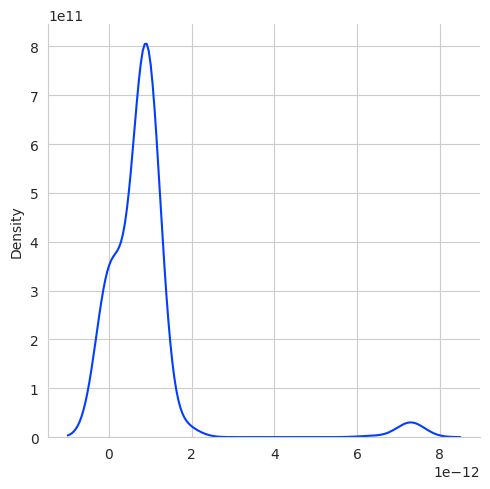

In [77]:
res = y_train['cnt'] - y_train_pred
sns.displot(res, kind='kde')

# Model Evaluation

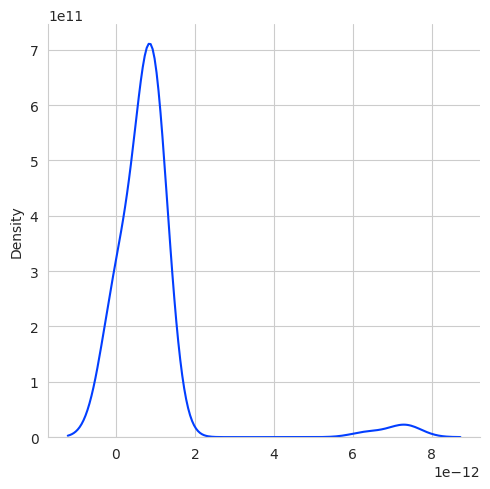

In [78]:
y_test_pred = lm.predict(X_test_rfe)
res = y_test['cnt'] - y_test_pred
sns.displot(res, kind='kde')

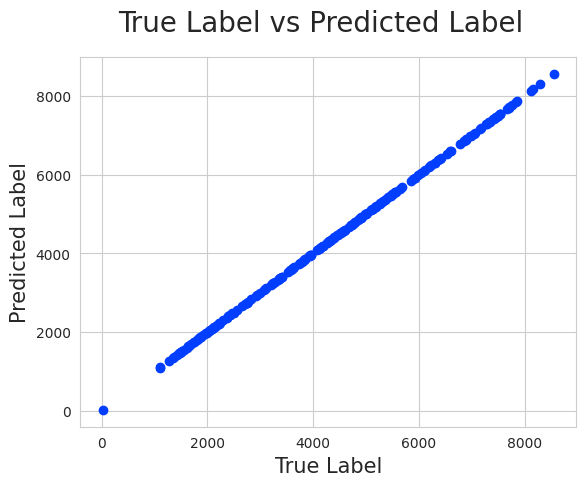

In [79]:
fig = plt.figure()

plt.scatter(y_test, y_test_pred)
fig.suptitle('True Label vs Predicted Label', fontsize=20)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

plt.show()